# Notebook for plotting neutrino data
* First plot is for all neutrino fluxes currently implemented in the code
* Second plot is for neutrino event rates for fluorine and helium
* Third plot is neutrino event numbers above threshold 

To do: add reactor, geoneutrinos and SN burst

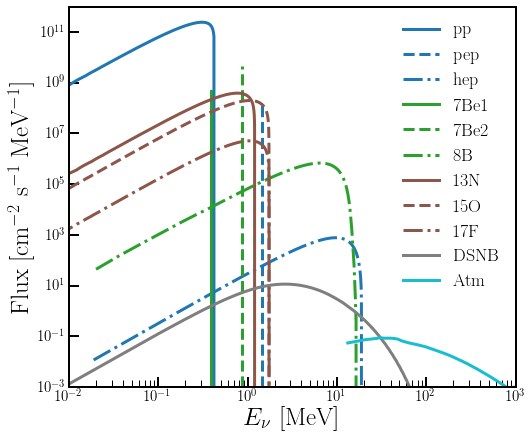

In [2]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.integrate import cumtrapz
from LabFuncs import *
from Params import *
from NeutrinoFuncs import *
plt.rcParams['axes.linewidth'] = 2
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams['axes.linewidth'] = 2
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)


# Load neutrino fluxes
# Set E_th = 0 so all of them get loaded
NuBG = GetNuFluxes(0.0,Xe131)
E_nu_all = NuBG.Energy
Flux_all = NuBG.Flux
n_nu = NuBG.NumberOfNeutrinos 
Errs = NuBG.Uncertainties

col = cm.tab10(linspace(0,1,5))
colnu = zeros(shape=(n_nu,4))
colnu[0,:] = col[0,:]
colnu[1,:] = col[0,:]
colnu[2,:] = col[0,:]
colnu[3,:] = col[1,:]
colnu[4,:] = col[1,:]
colnu[5,:] = col[1,:]
colnu[6,:] = col[2,:]
colnu[7,:] = col[2,:]
colnu[8,:] = col[2,:]
colnu[9,:] = col[3,:]
colnu[10,:] = col[4,:]
lsty = array(['-','--','-.','-','--','-.','-','--','-.','-','-'])
xmin = 1.0e-2
xmax = 1000.0
ymax = 1.0e12
ymin = 1.0e-3
for i in range(0,n_nu):
    if mono[i]:
        plt.loglog(E_nu_all[0,i]*array([1,1]),array([ymin,Flux_all[0,i]]),lsty[i],color=colnu[i,:],linewidth=3,label=nuname[i])
    else:
        plt.loglog(append(E_nu_all[:,i],E_nu_all[-1,i]),append(Flux_all[:,i],ymin),lsty[i],color=colnu[i,:],linewidth=3,label=nuname[i])



plt.xlabel(r"$E_\nu$ [MeV]",fontsize=25)
plt.ylabel(r"Flux [cm$^{-2}$ s$^{-1}$ MeV$^{-1}$]",fontsize=25)        
ax.set_xlim(left=xmin, right=xmax)
ax.set_ylim(bottom=ymin, top=ymax)
ax.tick_params(which='major',direction='in',width=2,length=10)
ax.tick_params(which='minor',direction='in',width=1,length=7)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=18,frameon=False)
plt.show()

fig.savefig('../plots/NeutrinoFluxes.pdf',bbox_inches='tight')

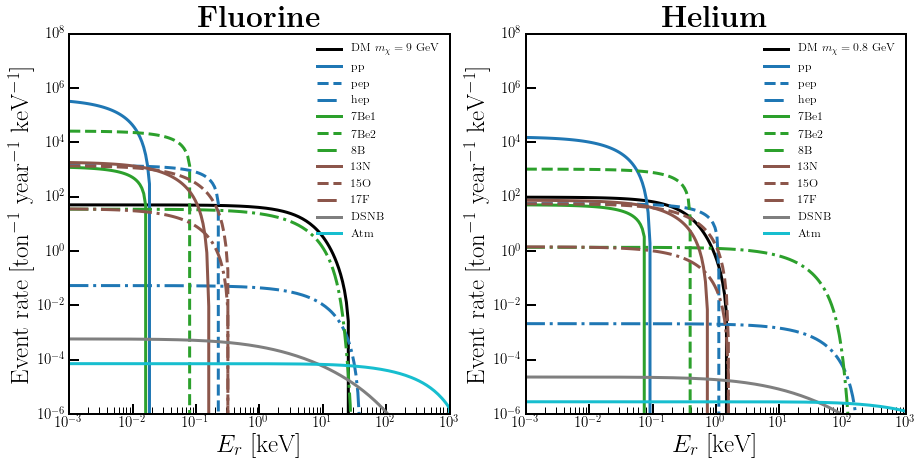

In [3]:
from WIMPFuncs import *


fig = plt.figure(figsize=(15,7))

ne = 200
E_r = logspace(-3.0,3.0,ne)
t = JulianDay(9,12,2018,18.0)*ones(shape=ne)
solar = NuBG.SolarLabel

DM = WIMP(9.0,1.0e-44)
wimplabel = r"DM $m_\chi = 9$ GeV"
HaloModel = SHM
Loc = Boulby

xmin = 1.0e-3
xmax = 1000.0
ymax = 1.0e8
ymin = 1.0e-6
tit = r"{\bf Fluorine}"
Nuc = F19    

for pli in [1,2]:
    ax = fig.add_subplot(1,2,pli)
    R  = dRdE_wimp(E_r,t,DM,HaloModel,Nuc,Loc)
    Ep = E_r[R>0.0]
    R = R[R>0.0]
    plt.loglog(append(Ep,Ep[-1]),append(R,ymin),'k-',linewidth=3,label=wimplabel)
    for i in range(0,n_nu):
        R = dRdE_nu(E_r,t,solar[i],E_nu_all[:,i],Flux_all[:,i],Nuc)
        Ep = E_r[R>0.0]
        R = R[R>0.0]
        plt.loglog(append(Ep,Ep[-1]),append(R,ymin),lsty[i],color=colnu[i,:],linewidth=3,label=nuname[i])

        plt.title(tit,fontsize=30)
        plt.xlabel(r"$E_r$ [keV]",fontsize=25)
        plt.ylabel(r"Event rate [ton$^{-1}$ year$^{-1}$ keV$^{-1}$]",fontsize=25) 
        
    ax.set_xlim(left=xmin, right=xmax)
    ax.set_ylim(bottom=ymin, top=ymax)
    ax.tick_params(which='major',direction='in',width=2,length=10)
    ax.tick_params(which='minor',direction='in',width=1,length=7)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)    
    plt.legend(fontsize=12,frameon=False)

    Nuc = He4
    DM.Mass = 0.8
    DM.SICrossSection = 1.0e-44
    tit = r"{\bf Helium}"
    wimplabel = r"DM $m_\chi = 0.8$ GeV"

    
plt.legend(fontsize=12,frameon=False)
plt.show()

fig.savefig('../plots/NeutrinoRates.pdf',bbox_inches='tight')

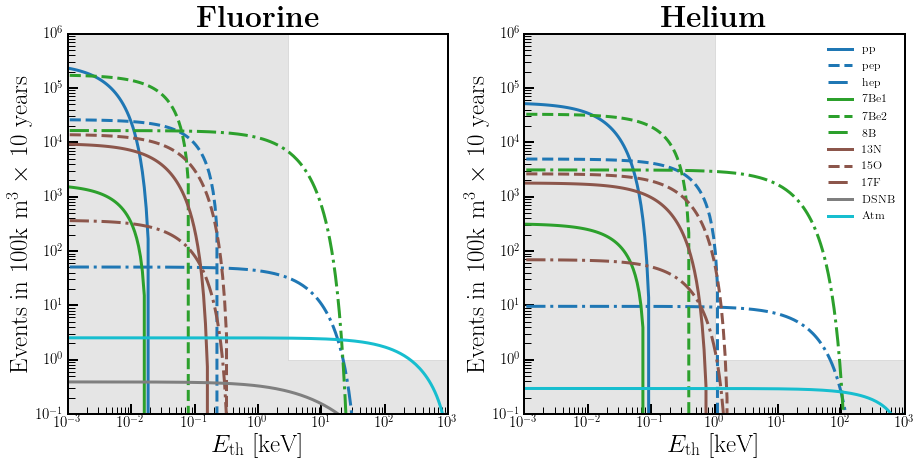

In [4]:
fig = plt.figure(figsize=(15,7))

ne = 200
E_r = logspace(-3.0,3.0,ne)
t = JulianDay(9,12,2018,18.0)*ones(shape=ne)
Exposure = (0.16*100)*10

xmin = 1.0e-3
xmax = 1000.0
ymax = 1.0e6
ymin = 1.0e-1
tit = r"{\bf Fluorine}"
Nuc = F19    
E_thresh = 3.0
for pli in [1,2]:
    ax = fig.add_subplot(1,2,pli)
    plt.fill(array([xmin,xmax,xmax,E_thresh,E_thresh,xmin]),array([ymin,ymin,1.0,1.0,ymax,ymax]),color='Gray',alpha=0.2,edgecolor="None")
    for i in range(0,n_nu):
        R = dRdE_nu(E_r,t,solar[i],E_nu_all[:,i],Flux_all[:,i],Nuc)
        Ep = E_r[R>0.0]
        R = R[R>0.0]
        N = zeros(shape=(size(R)-1))
        for j in range(0,size(R)-1):
            N[j] = sum(Exposure*0.5*(Ep[(j+1):]-Ep[j:-1])*(R[(j+1):]+R[j:-1]))
        plt.loglog(append(Ep[1:],Ep[-1]),append(N,ymin),lsty[i],color=colnu[i,:],linewidth=3,label=nuname[i])

        plt.title(tit,fontsize=30)
        plt.xlabel(r"$E_{\rm th}$ [keV]",fontsize=25)
        plt.ylabel(r"Events in 100k m$^3$ $\times$ 10 years",fontsize=25) 

    ax.set_xlim(left=xmin, right=xmax)
    ax.set_ylim(bottom=ymin, top=ymax)
    ax.tick_params(which='major',direction='in',width=2,length=10)
    ax.tick_params(which='minor',direction='in',width=1,length=7)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)    
    
    Nuc = He4
    tit = r"{\bf Helium}"
    E_thresh = 1.0
    
plt.legend(fontsize=12,frameon=False)
plt.show()

fig.savefig('../plots/NeutrinoEvents.pdf',bbox_inches='tight')

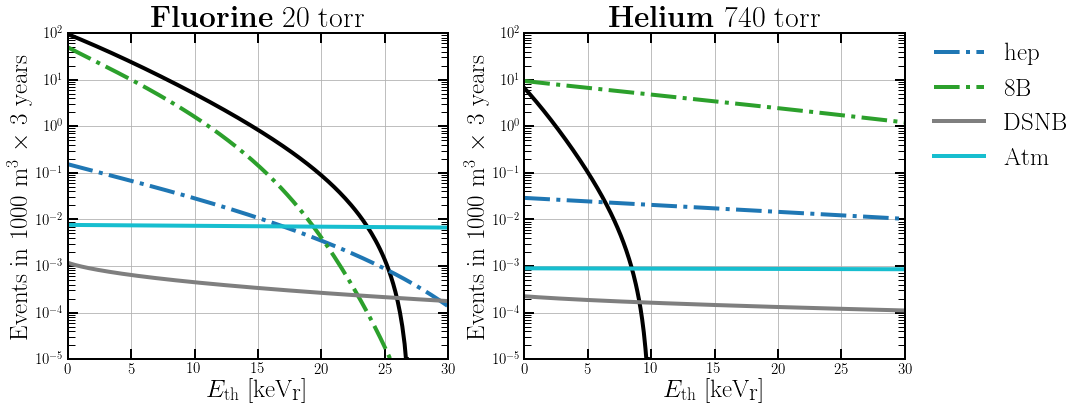

In [42]:
fig = plt.figure(figsize=(15,6))

ne = 2000
E_r = logspace(-3,3,ne)
t = JulianDay(9,12,2018,18.0)*ones(shape=ne)
Exposure = (0.16)*3

xmin = 1.0e-3
xmax = 30.0
ymax = 1.0e2
ymin = 1.0e-5
tit = r"{\bf Fluorine} 20 torr"
Nuc = F19  
DM = WIMP(9.0,1.0e-44)
wimplabel = r"DM $m_\chi = 9$ GeV"

#E_thresh = 3.0
for pli in [1,2]:
    ax = fig.add_subplot(1,2,pli)
    #plt.fill(array([xmin,xmax,xmax,E_thresh,E_thresh,xmin]),array([ymin,ymin,1.0,1.0,ymax,ymax]),color='Gray',alpha=0.2,edgecolor="None")
    R  = dRdE_wimp(E_r,t,DM,HaloModel,Nuc,Loc)
    Ep = E_r[R>0.0]
    R = R[R>0.0]
    N = zeros(shape=(size(R)-1))
    for j in range(0,size(R)-1):
        N[j] = sum(Exposure*0.5*(Ep[(j+1):]-Ep[j:-1])*(R[(j+1):]+R[j:-1]))
    plt.plot(append(Ep[1:],Ep[-1]),append(N,ymin),'k-',linewidth=4)

    for i in [2,5,9,10]:
        R = dRdE_nu(E_r,t,solar[i],E_nu_all[:,i],Flux_all[:,i],Nuc)
        Ep = E_r[R>0.0]
        R = R[R>0.0]
        N = zeros(shape=(size(R)-1))
        for j in range(0,size(R)-1):
            N[j] = sum(Exposure*0.5*(Ep[(j+1):]-Ep[j:-1])*(R[(j+1):]+R[j:-1]))
        plt.plot(append(Ep[1:],Ep[-1]),append(N,ymin),lsty[i],color=colnu[i,:],linewidth=4,label=nuname[i])

        plt.title(tit,fontsize=30)
        plt.xlabel(r"$E_{\rm th}$ [keV$_\textrm{r}$]",fontsize=25)
        plt.ylabel(r"Events in 1000 m$^3$ $\times$ 3 years",fontsize=25) 
       
    plt.grid()
    plt.yscale('log') 
    ax.set_xlim(left=xmin, right=xmax)
    ax.set_ylim(bottom=ymin, top=ymax)
    ax.tick_params(which='major',direction='in',width=2,length=10,top=True,right=True)
    ax.tick_params(which='minor',direction='in',width=1,length=7,top=True,right=True)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)    
    
    Nuc = He4
    tit = r"{\bf Helium} 740 torr"
    E_thresh = 1.0
    DM.Mass = 3.0
    DM.SICrossSection = 1.0e-44
    wimplabel = r"DM $m_\chi = 9$ GeV"
    
plt.legend(fontsize=25,frameon=False,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

fig.savefig('../plots/NeutrinoEvents.pdf',bbox_inches='tight')

In [24]:
nuname

['pp', 'pep', 'hep', '7Be1', '7Be2', '8B', '13N', '15O', '17F', 'DSNB', 'Atm']